<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+---------------+-----------------+-----------+---------------+
| Model         | Parameters      | Library   | Performance   |
+===============+=================+===========+===============+
| SVM           | kernel=rbf      | sklearn   | Accuracy=0.99 |
+---------------+-----------------+-----------+---------------+
| Random Forest | n_estimators=50 | sklearn   | Accuracy=1.00 |
+---------------+-----------------+-----------+---------------+


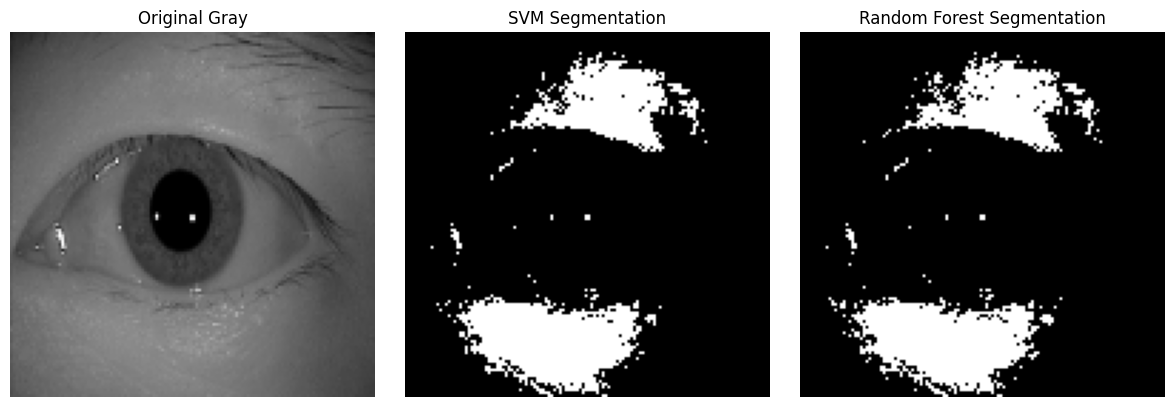

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tabulate import tabulate

def apply_ml_segmentation(image_path):
    # Load and resize image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    image_resized = cv2.resize(image, (128, 128))
    gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

    # Feature extraction - use pixel intensity and location
    h, w = gray.shape
    X = []
    for i in range(h):
        for j in range(w):
            X.append([gray[i, j], i, j])
    X = np.array(X)

    # Generate pseudo-labels for demo purposes (intensity thresholding)
    y = (X[:, 0] > 127).astype(int)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # SVM classifier
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X).reshape(h, w)

    # Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X).reshape(h, w)

    # Metrics
    svm_acc = accuracy_score(y, svm_model.predict(X))
    rf_acc = accuracy_score(y, rf_model.predict(X))

    table_data = [
        ["SVM", "kernel=rbf", "sklearn", f"Accuracy={svm_acc:.2f}"],
        ["Random Forest", "n_estimators=50", "sklearn", f"Accuracy={rf_acc:.2f}"],
    ]
    headers = ["Model", "Parameters", "Library", "Performance"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display result
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Gray")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(svm_pred, cmap='gray')
    plt.title("SVM Segmentation")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(rf_pred, cmap='gray')
    plt.title("Random Forest Segmentation")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_ml_segmentation("/content/S6000S00.jpg")
